# Lab 2 Gamma Ray & Muon
## Gamma Ray Stuff

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.optimize, scipy.signal
from numpy.polynomial import polynomial as P

In [ ]:
data = pd.read_csv(r'co_60_caliobration_data.csv', skiprows = 22)
data = data.iloc[:, 0::2]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

def gaussian_regression(x, y):
    """
    Performs Gaussian regression on data using scipy.optimize.curve_fit.
    
    Parameters:
    -----------
    x : ndarray
        Independent variable (x-coordinates)
    y : ndarray
        Dependent variable (y-coordinates)
    
    Returns:
    --------
    dict : Contains parameters, uncertainties, and fit quality metrics
    """
    
    def gaussian(x, amplitude, center, sigma, offset):
        return amplitude * np.exp(-((x - center) ** 2) / (2 * sigma ** 2)) + offset
    
    amplitude_guess = np.max(y) - np.min(y)
    center_guess = x[np.argmax(y)]
    sigma_guess = (np.max(x) - np.min(x)) / 4
    offset_guess = np.min(y)
    
    p0 = [amplitude_guess, center_guess, sigma_guess, offset_guess]
    
    try:
        popt, pcov = curve_fit(gaussian, x, y, p0=p0, maxfev=10000)
        
        perr = np.sqrt(np.diag(pcov))
        
        y_fit = gaussian(x, *popt)
        residuals = y - y_fit
        ss_res = np.sum(residuals ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r_squared = 1 - (ss_res / ss_tot)
        
        print("="*60)
        print("GAUSSIAN REGRESSION RESULTS")
        print("="*60)
        print(f"Amplitude:  {popt[0]:.6f} ± {perr[0]:.6f}")
        print(f"Center:     {popt[1]:.6f} ± {perr[1]:.6f}")
        print(f"Sigma:      {popt[2]:.6f} ± {perr[2]:.6f}")
        print(f"Offset:     {popt[3]:.6f} ± {perr[3]:.6f}")
        print(f"\nR² value:   {r_squared:.6f}")
        print("="*60)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        
        x_smooth = np.linspace(np.min(x), np.max(x), 300)
        y_smooth = gaussian(x_smooth, *popt)
        
        ax1.scatter(x, y, label='Data', alpha=0.6, s=50)
        ax1.plot(x_smooth, y_smooth, 'r-', label='Gaussian Fit', linewidth=2)
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_title('Gaussian Regression Fit')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        ax2.scatter(x, residuals, alpha=0.6, s=50)
        ax2.axhline(y=0, color='r', linestyle='--', linewidth=2)
        ax2.set_xlabel('x')
        ax2.set_ylabel('Residuals')
        ax2.set_title('Residual Plot')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return {
            'parameters': {
                'amplitude': popt[0],
                'center': popt[1],
                'sigma': popt[2],
                'offset': popt[3]
            },
            'uncertainties': {
                'amplitude': perr[0],
                'center': perr[1],
                'sigma': perr[2],
                'offset': perr[3]
            },
            'r_squared': r_squared,
            'covariance': pcov
        }
        
    except RuntimeError as e:
        print(f"Curve fitting failed: {e}")
        return None

GAUSSIAN REGRESSION RESULTS
Amplitude:  919.020939 ± 19.534435
Center:     919.891854 ± 0.130018
Sigma:      19.779480 ± 0.477971
Offset:     57.198738 ± 21.359335

R² value:   0.991936


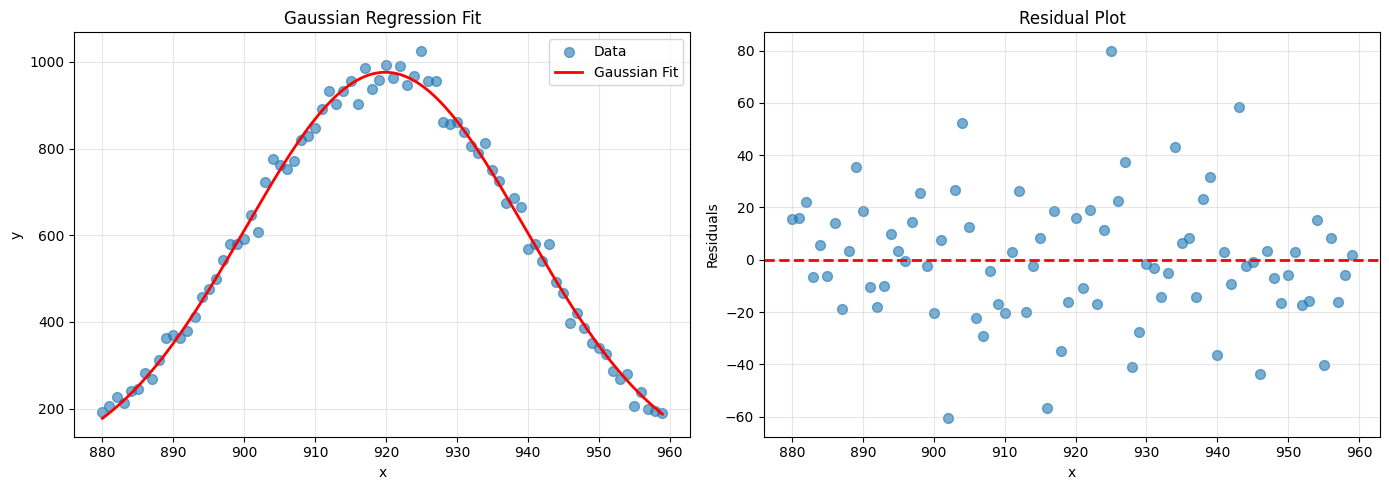

{'parameters': {'amplitude': np.float64(919.020939243493),
  'center': np.float64(919.8918537405267),
  'sigma': np.float64(19.779480158762997),
  'offset': np.float64(57.1987383028277)},
 'uncertainties': {'amplitude': np.float64(19.53443541569497),
  'center': np.float64(0.13001784885915332),
  'sigma': np.float64(0.4779708084792539),
  'offset': np.float64(21.35933467321969)},
 'r_squared': np.float64(0.9919357466094324),
 'covariance': array([[ 3.81594167e+02, -3.99976416e-02,  8.15690185e+00,
         -4.01986657e+02],
        [-3.99976416e-02,  1.69046410e-02, -8.11644217e-04,
          4.32149542e-02],
        [ 8.15690185e+00, -8.11644217e-04,  2.28456094e-01,
         -9.75799369e+00],
        [-4.01986657e+02,  4.32149542e-02, -9.75799369e+00,
          4.56221178e+02]])}

In [ ]:
gaussian_regression(np.asarray(data.iloc[880:960,0]),np.asarray(data.iloc[880:960,1]))


GAUSSIAN REGRESSION RESULTS
Amplitude:  1238.459438 ± 19.619216
Center:     811.514820 ± 0.139820
Sigma:      20.315169 ± 0.380349
Offset:     34.884856 ± 21.006922

R² value:   0.992450


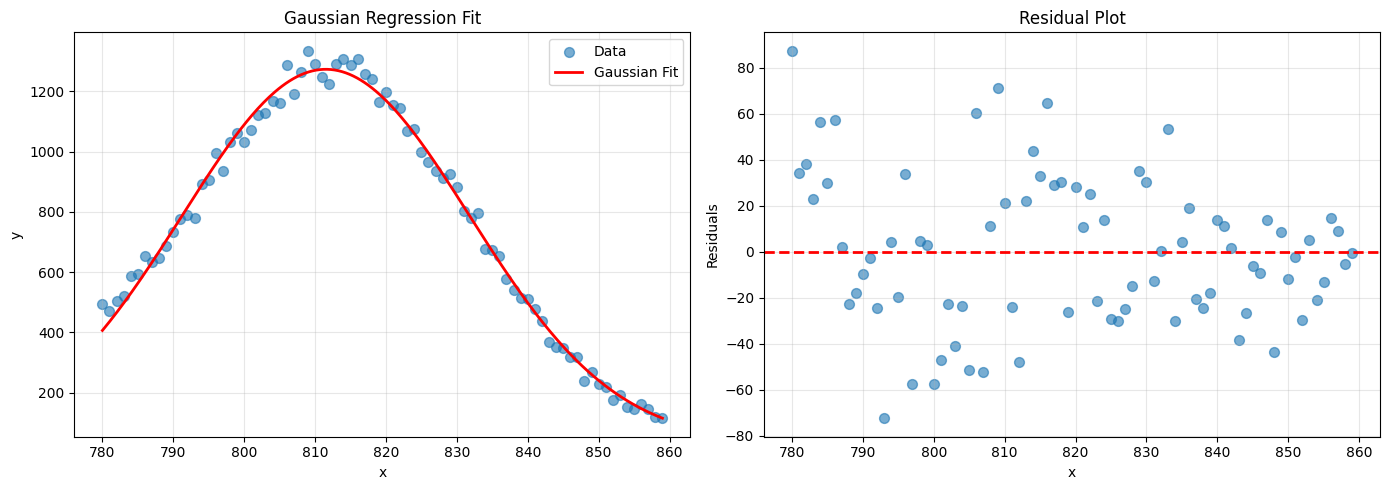

{'parameters': {'amplitude': np.float64(1238.459437517665),
  'center': np.float64(811.5148196985581),
  'sigma': np.float64(20.31516929547062),
  'offset': np.float64(34.88485620636459)},
 'uncertainties': {'amplitude': np.float64(19.61921634257752),
  'center': np.float64(0.1398199340416099),
  'sigma': np.float64(0.3803486189633121),
  'offset': np.float64(21.006922001967126)},
 'r_squared': np.float64(0.9924502902228094),
 'covariance': array([[ 3.84913650e+02,  5.25942706e-01,  5.72186498e+00,
         -3.84616385e+02],
        [ 5.25942706e-01,  1.95496140e-02,  5.37260275e-03,
         -5.25979683e-01],
        [ 5.72186498e+00,  5.37260275e-03,  1.44665072e-01,
         -7.31385656e+00],
        [-3.84616385e+02, -5.25979683e-01, -7.31385656e+00,
          4.41290772e+02]])}

In [ ]:
gaussian_regression(np.asarray(data.iloc[780:860,0]),np.asarray(data.iloc[780:860,1]))

In [5]:
nominal_data = pd.read_csv(r'.\gamma_muon_data\cs_137_1.7cm.csv', skiprows = 21)
tung_data = pd.read_csv(r'.\gamma_muon_data\cs_137_1.7cm067mm.csv', skiprows = 21)
tung_data_1 = pd.read_csv(r'.\gamma_muon_data\cs_137_1.7cm561mm.csv', skiprows = 21)
tung_data_2 = pd.read_csv(r'.\gamma_muon_data\cs_137_1.7cm_628.csv', skiprows = 21)

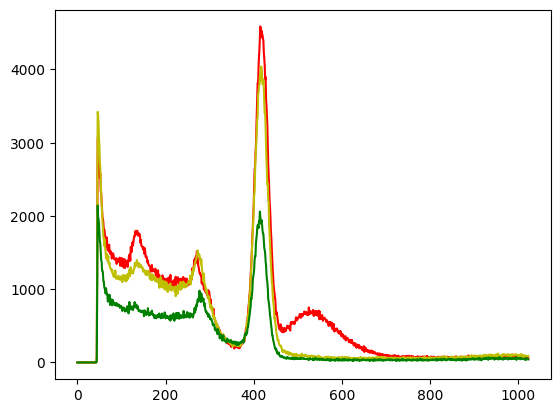

In [6]:
plt.plot(nominal_data.iloc[:, 0], nominal_data.iloc[:, -1], color = 'r')
plt.plot(tung_data.iloc[:,0], tung_data.iloc[:,-1], color = 'y')
plt.plot(tung_data_1.iloc[:,0], tung_data_1.iloc[:,-1], color = 'g')


GAUSSIAN REGRESSION RESULTS
Amplitude:  4182.997685 ± 21.870767
Center:     418.295932 ± 0.059771
Sigma:      14.195029 ± 0.109174
Offset:     348.061746 ± 20.665775

R² value:   0.998219


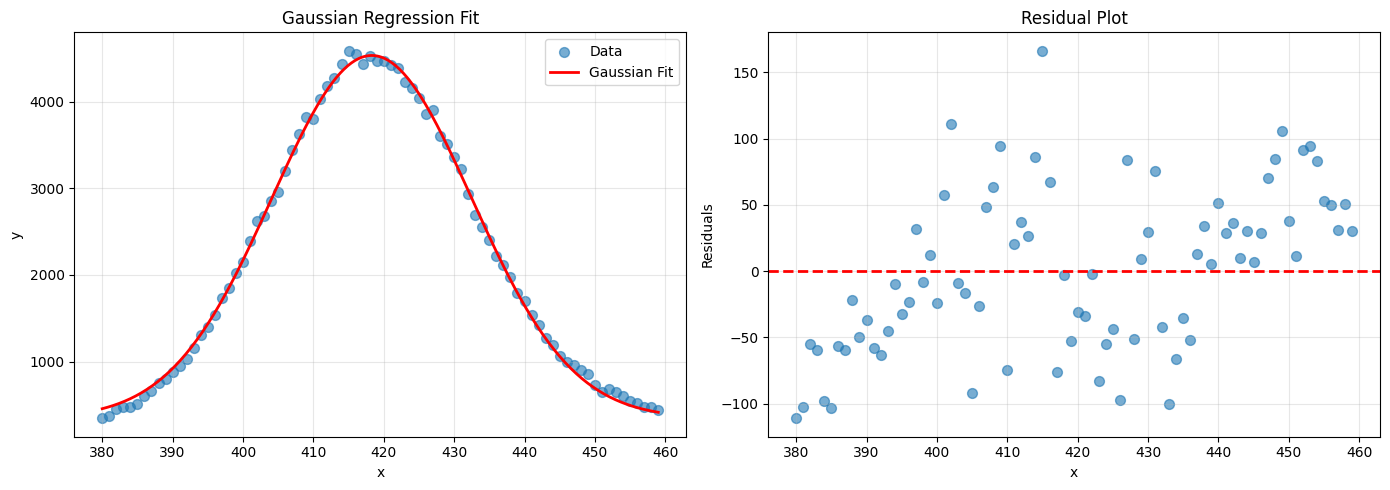

GAUSSIAN REGRESSION RESULTS
Amplitude:  3773.184820 ± 17.849512
Center:     416.960483 ± 0.054211
Sigma:      14.279205 ± 0.098726
Offset:     212.654739 ± 16.841528

R² value:   0.998543


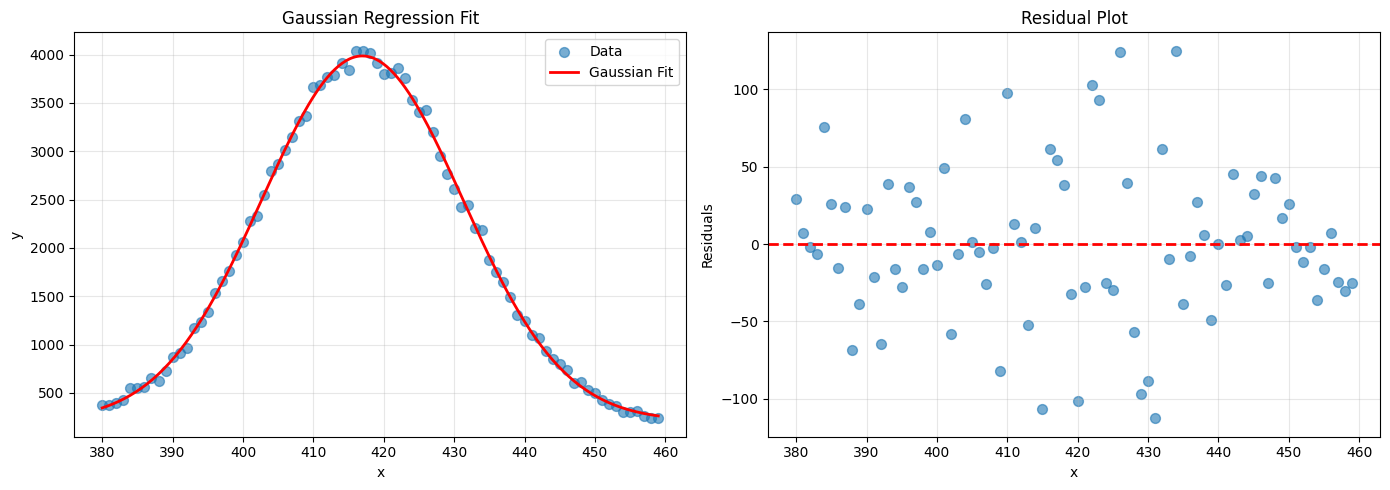

GAUSSIAN REGRESSION RESULTS
Amplitude:  1835.176640 ± 16.337637
Center:     414.161759 ± 0.103385
Sigma:      14.660984 ± 0.185744
Offset:     116.115723 ± 15.310621

R² value:   0.994861


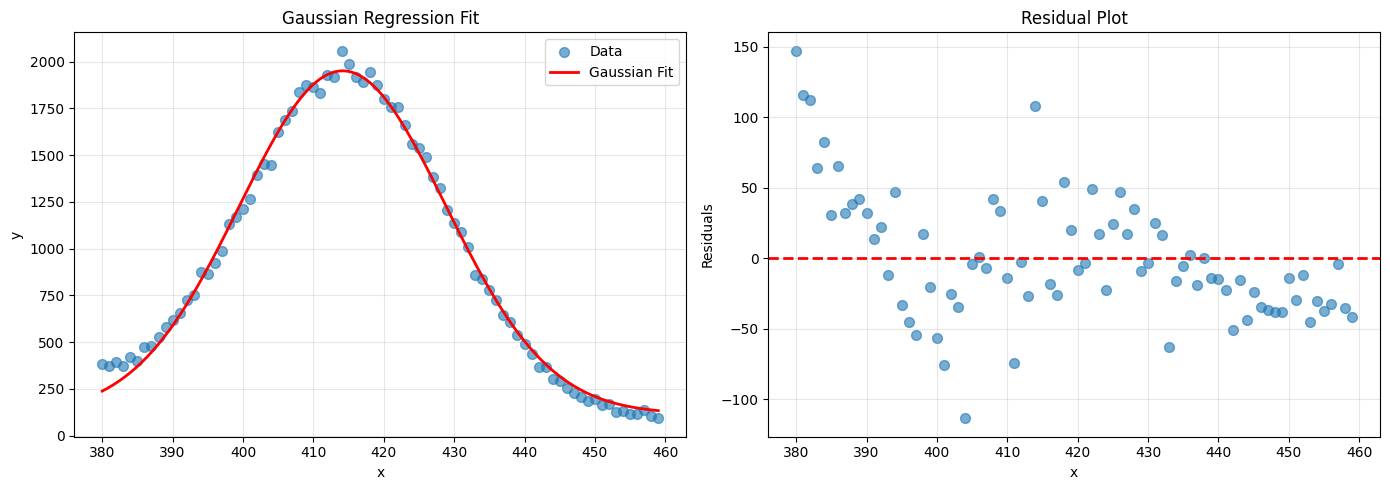

GAUSSIAN REGRESSION RESULTS
Amplitude:  1643.275253 ± 15.883789
Center:     414.193541 ± 0.111822
Sigma:      14.758866 ± 0.202840
Offset:     101.574170 ± 14.986798

R² value:   0.994014


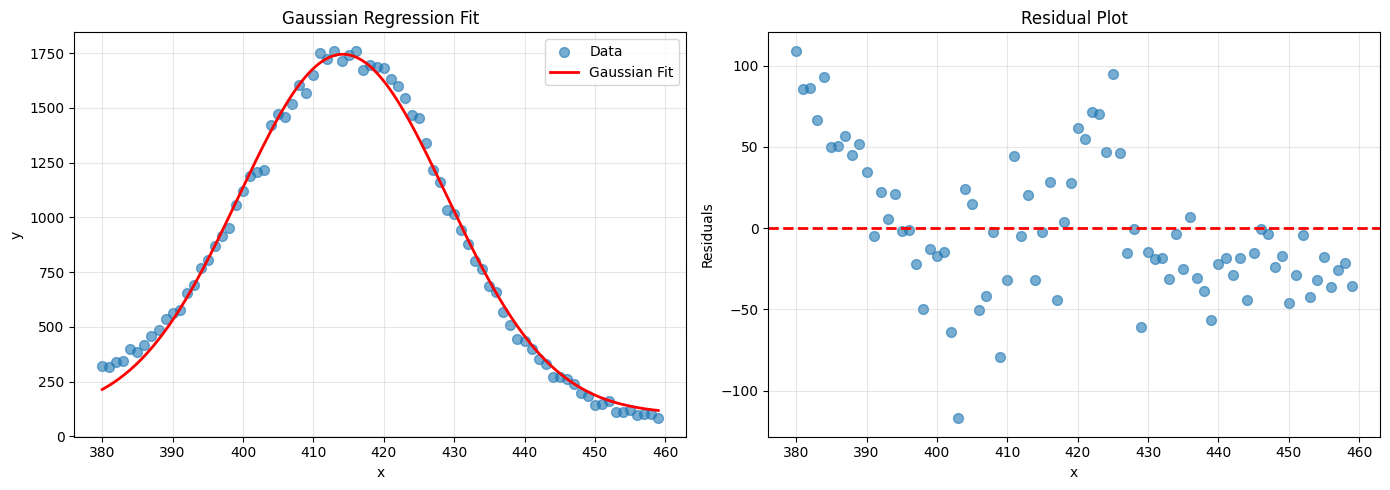

{'parameters': {'amplitude': np.float64(1643.275252863366),
  'center': np.float64(414.19354089231695),
  'sigma': np.float64(14.758865549132947),
  'offset': np.float64(101.57417041988472)},
 'uncertainties': {'amplitude': np.float64(15.88378881617238),
  'center': np.float64(0.1118219419524554),
  'sigma': np.float64(0.20283950232267464),
  'offset': np.float64(14.986797730083014)},
 'r_squared': np.float64(0.9940140055073448),
 'covariance': array([[ 2.52294747e+02,  7.35528585e-02,  1.25247789e+00,
         -1.74827503e+02],
        [ 7.35528585e-02,  1.25041467e-02,  7.79687100e-04,
         -8.44594088e-02],
        [ 1.25247789e+00,  7.79687100e-04,  4.11438637e-02,
         -2.52175826e+00],
        [-1.74827503e+02, -8.44594088e-02, -2.52175826e+00,
          2.24604106e+02]])}

In [7]:
gaussian_regression(np.asarray(nominal_data.iloc[380:460,0]),np.asarray(nominal_data.iloc[380:460,-1]))
gaussian_regression(np.asarray(tung_data.iloc[380:460,0]),np.asarray(tung_data.iloc[380:460,-1]))
gaussian_regression(np.asarray(tung_data_1.iloc[380:460,0]),np.asarray(tung_data_1.iloc[380:460,-1]))
gaussian_regression(np.asarray(tung_data_2.iloc[380:460,0]),np.asarray(tung_data_2.iloc[380:460,-1]))

In [5]:
paths= [r'\25-10-09-11-10.data',
        r'\25-10-09-18-23.data',
        r'\25-10-16-09-14.data',
        r'\25-10-23-09-24.data']
paths = [r'.\gamma_muon_data' + path for path in paths]
muon_data = pd.concat([pd.read_csv(path, header = None, delimiter=' ') for path in paths], axis=0, ignore_index=True)
# ! Don't filter out non decaying muons for raw counts
#muon_data = muon_data.loc[muon_data.iloc[:,0] < 20_000]
muon_data.shape

(12346727, 2)

(170000.0, 210000.0)

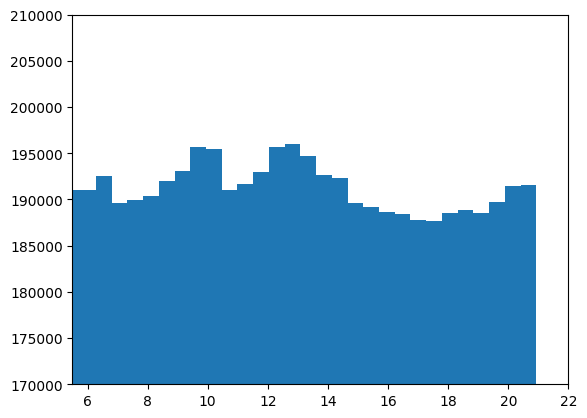

In [5]:
days = (np.max(muon_data.iloc[:,1]) - np.min(muon_data.iloc[:,1]))/86400
plt.hist((muon_data.iloc[:,1] - np.min(muon_data.iloc[:,1]))/86400, bins = 2*int(days))
plt.xlim(5.5,22)
plt.ylim(170_000, 210_000)

In [6]:
decays = muon_data.loc[muon_data.iloc[:,0] < 20_000]
decays

,0,1
7611,14880,1760024522
12423,1920,1760024573
18736,17860,1760024639
21060,120,1760024664
21099,4440,1760024664
...,...,...
12343526,40,1761830028
12343766,1400,1761830082
12344307,4300,1761830208
12344861,2160,1761830339


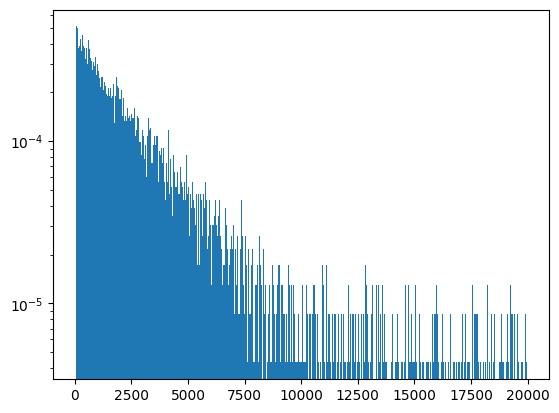

In [30]:
plt.hist(decays.iloc[:, 0], bins = 1000, density=True)
plt.yscale('log')

## SUMMED MUON COUNTS

In [64]:
import numpy as np
from scipy.optimize import minimize
from numpy.linalg import inv, LinAlgError

def _nll_transformed(p, x, y):
    # p = [theta, alpha, beta]
    theta, alpha, beta = p

    lam = np.exp(theta * x + alpha) + np.exp(beta)

    # numeric safety
    if np.any(lam <= 0) or np.any(~np.isfinite(lam)):
        return 1e100
    score = np.sum(lam - y * np.log(lam))
    return score

def _numerical_hessian(func, x0, eps=1e-5):
    x0 = np.asarray(x0, dtype=float)
    n = x0.size
    H = np.zeros((n, n), dtype=float)
    # central difference mixed partials
    for i in range(n):
        for j in range(i, n):
            ei = np.zeros(n); ei[i] = eps
            ej = np.zeros(n); ej[j] = eps
            f1 = func(x0 + ei + ej)
            f2 = func(x0 + ei - ej)
            f3 = func(x0 - ei + ej)
            f4 = func(x0 - ei - ej)
            Hij = (f1 - f2 - f3 + f4) / (4 * eps * eps)
            H[i, j] = Hij
            H[j, i] = Hij
    return H

def fit_poisson_from_times(t, bins='fd', return_bins=False, hess_eps=1e-5):
    """
    Fit lambda(x) = exp(theta*x + alpha) + beta to decay times using Poisson likelihood.

    Inputs:
      t           : 1D array of event times (float). Only required input.
      bins        : bins for histogram. Passed to np.histogram_bin_edges.
                    Default 'fd' (Freedman-Diaconis). Can be int or sequence.
      return_bins : if True, also return (bin_edges, counts, x_midpoints).
      hess_eps    : finite-difference step for Hessian.

    Returns:
      result dict with keys:
        theta, alpha, beta           : MLE params
        stderr                        : dict with parameter standard errors {'theta', 'alpha', 'beta'}
        cov_transformed               : covariance in transformed parameter space [theta, alpha, b]
        success, message              : optimizer info
        (optionally) bins, counts, x : if return_bins True
    Notes:
      - This function bins the supplied times into counts and treats counts as Poisson observations.
      - Beta is constrained positive by parametrizing b = log(beta). stderr['beta'] uses delta method.
      - Hessian is computed numerically. For small data sets Hessian may be ill-conditioned.
    """
    t = np.asarray(t, dtype=float).ravel()
    if t.size == 0:
        raise ValueError("Input times vector t is empty.")

    edges = np.histogram_bin_edges(t, bins=bins)
    counts, _ = np.histogram(t, bins=edges)
    mids = 0.5 * (edges[:-1] + edges[1:])
    sizes = (edges[1:] - edges[:-1])
    x = mids
    y = counts.astype(float)

    # initial guesses:
    # Fit rough log-linear ignoring beta by forcing beta small.
    # avoid zeros for log
    y_plus = y.copy()
    y_plus[y_plus == 0] = 1e-8
    A = np.vstack([x, np.ones_like(x)]).T
    w = np.log(y_plus)
    try:
        sol, *_ = np.linalg.lstsq(A, w, rcond=None)
        theta0, alpha0 = sol[0], sol[1]
    except LinAlgError:
        theta0, alpha0 = 0.0, np.log(np.maximum(y.mean(), 1e-3))
    
    beta0 = (y[mids>18000]).mean()
    print(beta0)
    p0 = np.array([theta0, alpha0, np.log(beta0)], dtype=float)
    
    res = minimize(_nll_transformed, p0, args=(x, y),
                    method='L-BFGS-B',
                    options={'ftol':1e-12, 'gtol':1e-8, 'maxiter':10_000},
                    bounds = [(-1e-02,-1e-06),
                              (0, 10),
                              (-10, 1)])
    
    p_hat = res.x
    theta_hat, alpha_hat, b_hat, = p_hat
    beta_hat = np.exp(b_hat)
    tau_hat = np.inf

    try:
        H = _numerical_hessian(lambda p: _nll_transformed(p, x, y), p_hat, eps=hess_eps)
        # invert observed Fisher information (H is Hessian of nll -> fisher = H)
        cov = inv(H)
        
        # standard errors of theta and alpha are sqrt of diag
        se_theta = np.sqrt(np.maximum(0.0, cov[0,0]))
        se_alpha = np.sqrt(np.maximum(0.0, cov[1,1]))

        # for beta use delta method: 
        # Var(beta) = (d beta / d b)^2 Var(b) = beta^2 * Var(b)
        var_b = cov[2,2]
        se_beta = np.sqrt(np.maximum(0.0, (beta_hat**2) * var_b))

        # tau = 1/theta
        if theta_hat == 0:
            tau_hat = np.inf
            se_tau = np.nan
        else:
            tau_hat = 1.0 / theta_hat
            se_tau = np.sqrt(np.maximum(0.0, cov[0,0] / (theta_hat**4)))
    except (LinAlgError, ValueError):
        cov = None
        se_theta = se_alpha = se_beta =se_tau= np.nan

    out = {
        'theta': float(theta_hat),
        'tau' : float(tau_hat),
        'alpha': float(alpha_hat),
        'beta': float(beta_hat),
        'stderr': {
            'theta': float(se_theta), 
            'tau' : float(se_tau),
            'alpha': float(se_alpha), 
            'beta': float(se_beta)
        },
        'cov_transformed': cov,
        'success': bool(res.success),
        'message': res.message
    }

    if return_bins:
        out.update({'bin_edges': edges, 'counts': y, 'x_midpoints': x})

    return out

12.0
.\gamma_muon_data\25-10-09-11-10.data
	theta = -2.5351e-04 +- 0.0000e+00
	tau = -3.9446e+03 +- 0.0000e+00
	alpha = 4.4954e+00 +- 9.8837e-02
	beta = 2.7183e+00 +- 0.0000e+00
13.4
.\gamma_muon_data\25-10-09-18-23.data
	theta = -3.7808e-04 +- 0.0000e+00
	tau = -2.6450e+03 +- 0.0000e+00
	alpha = 6.3524e+00 +- 1.9040e-02
	beta = 2.7183e+00 +- 0.0000e+00
1.6666666666666667
.\gamma_muon_data\25-10-16-09-14.data
	theta = -4.7126e-04 +- 9.1703e-06
	tau = -2.1220e+03 +- 4.1292e+01
	alpha = 6.3589e+00 +- 2.4482e-02
	beta = 1.8489e+00 +- 3.0275e-01
1.3333333333333333
.\gamma_muon_data\25-10-23-09-24.data
	theta = -4.9988e-04 +- 1.0338e-05
	tau = -2.0005e+03 +- 4.1370e+01
	alpha = 6.2898e+00 +- 2.5549e-02
	beta = 1.9967e+00 +- 2.9864e-01


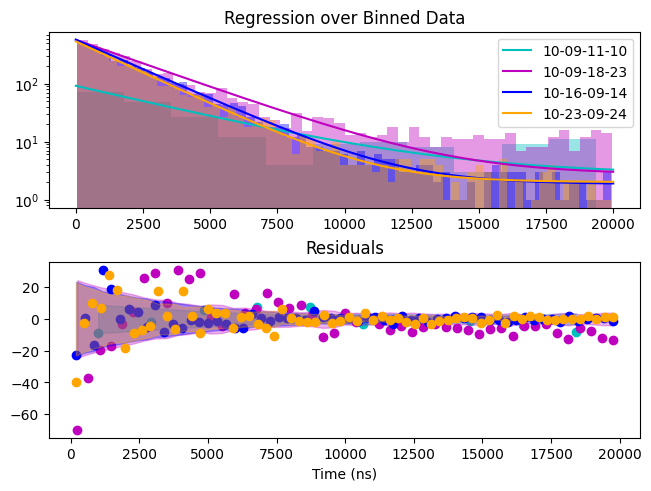

In [65]:
paths= [r'\25-10-09-11-10.data',
        r'\25-10-09-18-23.data',
        r'\25-10-16-09-14.data',
        r'\25-10-23-09-24.data']
paths = [r'.\gamma_muon_data' + path for path in paths]
t_max = 20_000
fig, axs = plt.subplots(2, 1)
ts = np.linspace(0, t_max, num = 2_000)
colors = ['c', 'm', 'b', 'orange']
for i, path in enumerate(paths):
    data = pd.read_csv(path, header = None, delimiter=' ')
    decays = data.loc[data.iloc[:,0] < t_max]
    decays = decays.iloc[:,0]
    results = fit_poisson_from_times(decays, return_bins=True)
    
    print('='*60)
    print(path)
    for j,p in enumerate(['theta', 'tau', 'alpha', 'beta']):
            print(f'\t{p} = {results[p]:.4e} +- {results['stderr'][p]:.4e}')
    
    reg_model = lambda t_vals: np.exp(results['theta'] * t_vals + results['alpha']) + results['beta'] 
    counts = reg_model(ts)
    
    axs[0].hist(decays, bins = results['bin_edges'].shape[0], alpha = 0.4, color = colors[i])
    axs[0].plot(ts, counts, c = colors[i], label = path[21:-5])
    
    t_vals = results['x_midpoints']
    count_vals = reg_model(t_vals)
    observed_counts = results['counts']
    residuals = count_vals - observed_counts
    count_error = np.sqrt(observed_counts)
    axs[1].scatter(t_vals,
            count_vals - observed_counts,
            c = colors[i],
            alpha = 1)
    axs[1].fill_between(t_vals, 
            -count_error,
            count_error,
            color = colors[i],
            alpha = 0.3)
axs[0].set_title('Regression over Binned Data')
axs[0].set_yscale('log')
axs[0].legend()
axs[1].set_title('Residuals')
axs[1].set_xlabel('Time (ns)') #I think this was the correct units
fig.set_layout_engine('constrained')

## MUON + - split

In [1]:
def _nll_transformed(p, x, y):
    # p = [theta1, alpha1, theta2, alpha2, b]
    theta1, alpha1, theta2, alpha2, b = p

    beta = np.exp(b)# beta constrained positive via log parametrization
    lam = np.exp(theta1 * x + alpha1) + np.exp(theta2 * x + alpha2) + beta
    print(p)
    # numeric safety
    if np.any(lam <= 0) or np.any(~np.isfinite(lam)):
        return 1e300

    neg_poisson_log_like = np.sum(lam - y * np.log(lam))
    return neg_poisson_log_like

def _numerical_hessian(func, x0, eps=1e-5):
    x0 = np.asarray(x0, dtype=float)
    n = x0.size
    H = np.zeros((n, n), dtype=float)
    # central difference mixed partials
    for i in range(n):
        for j in range(i, n):
            ei = np.zeros(n); ei[i] = eps
            ej = np.zeros(n); ej[j] = eps
            f1 = func(x0 + ei + ej)
            f2 = func(x0 + ei - ej)
            f3 = func(x0 - ei + ej)
            f4 = func(x0 - ei - ej)
            Hij = (f1 - f2 - f3 + f4) / (4 * eps * eps)
            H[i, j] = Hij
            H[j, i] = Hij
    return H

def fit_poisson_from_times(t, bins='fd', return_bins=False, hess_eps=1e-5):
    """
    Fit lambda(x) = exp(theta1*x + alpha1) + exp(theta2*x + alpha2) + beta
    to decay times using Poisson likelihood.

    Inputs:
      t           : 1D array of event times (float). Only required input.
      bins        : bins for histogram. Passed to np.histogram_bin_edges.
                    Default 'fd' (Freedman-Diaconis). Can be int or sequence.
      return_bins : if True, also return (bin_edges, counts, x_midpoints).
      hess_eps    : finite-difference step for Hessian.

    Returns:
      result dict with keys:
        theta1, alpha1, theta2, alpha2, beta   : MLE params
        stderr                                : dict with parameter standard errors
                                                {'theta1','alpha1','theta2','alpha2','beta'}
        cov_transformed                       : covariance in transformed parameter space
                                                for params [theta1,alpha1,theta2,alpha2,b]
        success, message                      : optimizer info
        (optionally) bins, counts, x          : if return_bins True

    Notes:
      - This function bins the supplied times into counts and treats counts as Poisson observations.
      - Beta is constrained positive by parametrizing b = log(beta). stderr['beta'] uses delta method.
      - Hessian is computed numerically. For small data sets Hessian may be ill-conditioned.
    """
    t = np.asarray(t, dtype=float).ravel()
    if t.size == 0:
        raise ValueError("Input times vector t is empty.")

    edges = np.histogram_bin_edges(t, bins=bins)
    counts, _ = np.histogram(t, bins=edges)
    mids = 0.5 * (edges[:-1] + edges[1:])
    x = mids
    y = counts.astype(float)

    # --- initial guesses ---
    y_plus = y.copy()
    y_plus[y_plus == 0] = 1e-8

    A = np.vstack([x, np.ones_like(x)]).T
    w = np.log(y_plus)
    try:
        sol, *_ = np.linalg.lstsq(A, w, rcond=None)
        theta0, alpha0 = float(sol[0]), float(sol[1])
    except Exception:
        theta0, alpha0 = 0.0, np.log(np.maximum(y.mean(), 1e-3))

    beta0 = 1

    alpha1_0 = alpha2_0 = 0.5 * alpha0
    theta1_0, theta2_0 = 0.9995*theta0, 1.0005*theta0

    p0 = np.array([theta1_0, alpha1_0, theta2_0, alpha2_0, np.log(beta0)], dtype=float)

    # minimize negative log-likelihood
    res = minimize(_nll_transformed, p0, args=(x, y),
                   method='L-BFGS-B',
                   options={'ftol':1e-12, 'gtol':1e-8, 'maxiter':10_000},
                   bounds=[
                (-1e-02, 0),   # theta1
                (0, 1e3),   # alpha1
                (-1e-02, 0),   # theta2
                (0, 1e3),   # alpha2
                (np.log(1e-3), np.log(10))    # b = log(beta)
            ])

    p_hat = res.x
    theta1_hat, alpha1_hat, theta2_hat, alpha2_hat, b_hat = p_hat
    beta_hat = np.exp(b_hat)

    # numerical Hessian of nll at optimum in transformed params
    try:
        H = _numerical_hessian(lambda p: _nll_transformed(p, x, y), p_hat, eps=hess_eps)
        cov = inv(H)

        # standard errors for transformed params
        se_theta1 = np.sqrt(np.maximum(0.0, cov[0, 0]))
        se_alpha1 = np.sqrt(np.maximum(0.0, cov[1, 1]))
        se_theta2 = np.sqrt(np.maximum(0.0, cov[2, 2]))
        se_alpha2 = np.sqrt(np.maximum(0.0, cov[3, 3]))

        # delta method for beta from b
        var_b = cov[4, 4]
        se_beta = np.sqrt(np.maximum(0.0, (beta_hat**2) * var_b))

    except (LinAlgError, ValueError, np.linalg.LinAlgError):
        cov = None
        se_theta1 = se_alpha1 = se_theta2 = se_alpha2 = se_beta = np.nan

    out = {
        'theta1': float(theta1_hat),
        'alpha1': float(alpha1_hat),
        'theta2': float(theta2_hat),
        'alpha2': float(alpha2_hat),
        'beta': float(beta_hat),
        'stderr': {
            'theta1': float(se_theta1),
            'alpha1': float(se_alpha1),
            'theta2': float(se_theta2),
            'alpha2': float(se_alpha2),
            'beta': float(se_beta)
        },
        'cov_transformed': cov,
        'success': bool(res.success),
        'message': res.message
    }

    if return_bins:
        out.update({'bin_edges': edges, 'counts': y, 'x_midpoints': x})

    return out

[-5.0764e-04  3.2887e+00 -5.6107e-04  3.2887e+00  0.0000e+00]
[-5.0763e-04  3.2887e+00 -5.6107e-04  3.2887e+00  0.0000e+00]
[-5.0764e-04  3.2887e+00 -5.6107e-04  3.2887e+00  0.0000e+00]
[-5.0764e-04  3.2887e+00 -5.6106e-04  3.2887e+00  0.0000e+00]
[-5.0764e-04  3.2887e+00 -5.6107e-04  3.2887e+00  0.0000e+00]
[-5.0764e-04  3.2887e+00 -5.6107e-04  3.2887e+00  1.0000e-08]
[7.6682e-01 3.2891e+00 6.4070e-01 3.2890e+00 8.2110e-05]
[7.6682e-01 3.2891e+00 6.4070e-01 3.2890e+00 8.2110e-05]
[7.6682e-01 3.2891e+00 6.4070e-01 3.2890e+00 8.2110e-05]
[7.6682e-01 3.2891e+00 6.4070e-01 3.2890e+00 8.2110e-05]
[7.6682e-01 3.2891e+00 6.4070e-01 3.2890e+00 8.2110e-05]
[7.6682e-01 3.2891e+00 6.4070e-01 3.2890e+00 8.2120e-05]
[-5.0764e-04  3.2887e+00 -5.6107e-04  3.2887e+00  0.0000e+00]
[-5.0763e-04  3.2887e+00 -5.6107e-04  3.2887e+00  0.0000e+00]
[-5.0764e-04  3.2887e+00 -5.6107e-04  3.2887e+00  0.0000e+00]
[-5.0764e-04  3.2887e+00 -5.6106e-04  3.2887e+00  0.0000e+00]
[-5.0764e-04  3.2887e+00 -5.6107e-04  

C:\Users\volca\AppData\Local\Temp\ipykernel_17464\1836506231.py:6: RuntimeWarning: overflow encountered in exp
  lam = np.exp(theta1 * x + alpha1) + np.exp(theta2 * x + alpha2) + beta


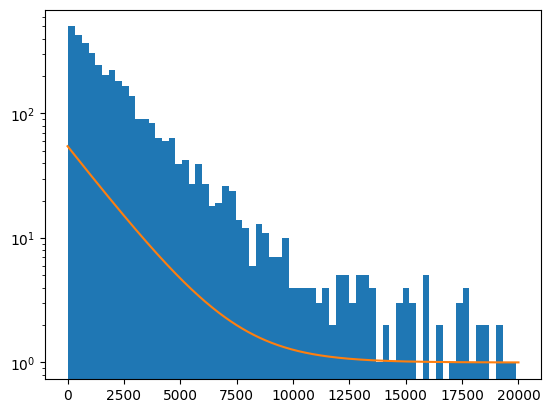

In [142]:
def double_exp_reg(x, alpha_1, alpha_2, theta_1, theta_2, beta):
    return np.exp(theta_1 * x + alpha_1) + np.exp(theta_2 * x + alpha_2) + beta
np.set_printoptions(4)
results = fit_poisson_from_times(decays, return_bins=True)
ts = np.linspace(0, 20_000, 1000)

counts = double_exp_reg(ts,
                    results['alpha1'], results['alpha2'],
                    results['theta1'], results['theta2'],
                    results['beta'])

plt.hist([decays], bins = results['bin_edges'].shape[0])
plt.plot(ts, counts)
plt.yscale('log')
for p in results['stderr'].keys():
    print(f'{p} = {results[p]:.4e} +- {results['stderr'][p]:.4e}')